<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week3_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***D. PRAKTIKUM PERTEMUAN 3***

**Fali Irham Maulana / 2341720121**

**TI 3F**

---



# ***D1. Operasi Citra Sederhana***

In [2]:
#Load library

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan50


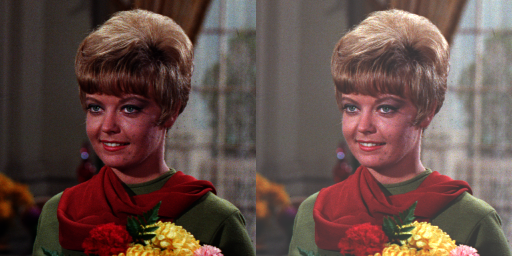

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = float(input('Masukkan nilai kecerahan'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+ brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)



---


# ***TUGAS PRAKTIKUM D1***

 Melakukan Perubahan Inverse pada KTM 
--------------------------------------


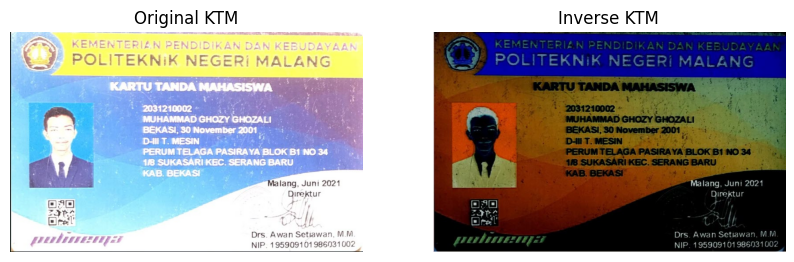

In [ ]:
#1. Mengimplementasikan inverse citra

print(' Melakukan Perubahan Inverse pada KTM ')
print('--------------------------------------')

ktm = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/KTM lama.jpg')

inverse_ktm = 255 - ktm

# final_frame = cv.hconcat((ktm, inverse_ktm))
# cv2_imshow(final_frame)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title('Original KTM')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(inverse_ktm, cv.COLOR_BGR2RGB))
plt.title('Inverse KTM')
plt.axis('off')

plt.show()

Mengimplementasikan transformasi kontras
---------------------------------------
Masukkan nilai kecerahan 50
Masukkan nilai kontras 2


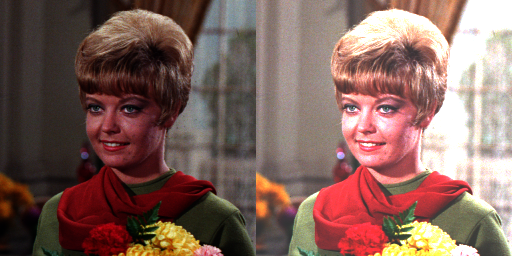

In [ ]:
#2. Mengimplementasikan transformasi contrast

print('Mengimplementasikan transformasi kontras')
print('---------------------------------------')

try:
  brightness = float(input('Masukkan nilai kecerahan '))
  contrast = float(input('Masukkan nilai kontras '))
except ValueError:
  print('Error, not a number')


# g(x) = alpha * f(x) + beta
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)


final_frame_contrast = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame_contrast)

Mengimplementasikan transformasi logaritmik
-------------------------------------------
Masukkan nilai kecerahan 50


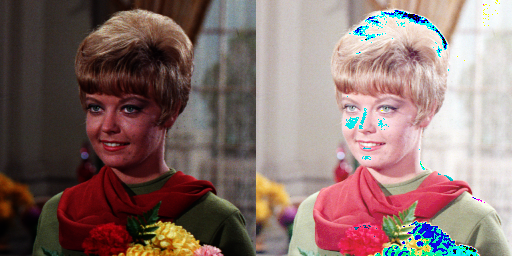

In [ ]:
# 3 Mengimplementasi transformasi logarithmic brightness

print('Mengimplementasikan transformasi logaritmik')
print('-------------------------------------------')

try:
   c = float(input('Masukkan nilai kecerahan '))
except ValueError:
  print('Error, not a number')


log_image = c * np.log(1 + original)
log_image = np.array(log_image, dtype='uint8')

final_frame_log = cv.hconcat((original, log_image))

cv2_imshow(final_frame_log)

Mengimplementasikan transformasi grayscale (Metode Averaging)
--------------------------------------------------------------------


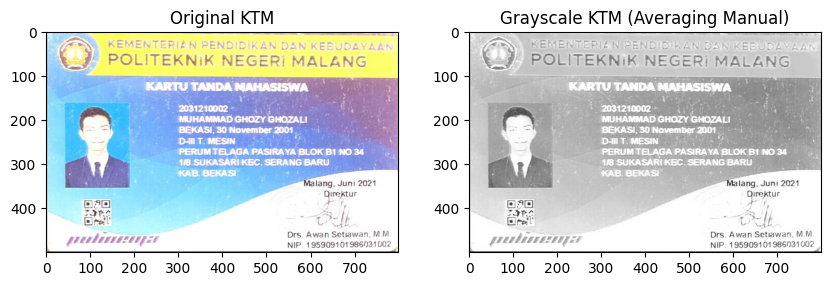

In [ ]:
# 4. Mengimplementasikan transformasi grayscale

# A. Metode Averaging
print('Mengimplementasikan transformasi grayscale (Metode Averaging)')
print('--------------------------------------------------------------------')

# Mengambil dimensi gambar
height, width, channels = ktm.shape

grayscale_image_manual = np.zeros((height, width), dtype='uint8')

for y in range(height):
  for x in range(width):
    # Ngambil Value R ,G ,B tiap pixel nya
    r, g, b = ktm[y, x]

    # Menghitung Rata - rata dengan rumus R + G + B / 3
    average_value = (int(r) + int(g) + int(b)) // 3

    # Menyimpan Ke Array Grayscale
    grayscale_image_manual[y, x] = average_value

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title('Original KTM')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_manual, cmap='gray')
plt.title('Grayscale KTM (Averaging Manual)')
plt.show()

Mengimplementasikan transformasi grayscale (Metode Lightness
--------------------------------------------------------------------


/tmp/ipython-input-3444230226.py:16: RuntimeWarning: overflow encountered in scalar add
  lightness_value = (max(r, g, b) + min(r, g, b)) // 2


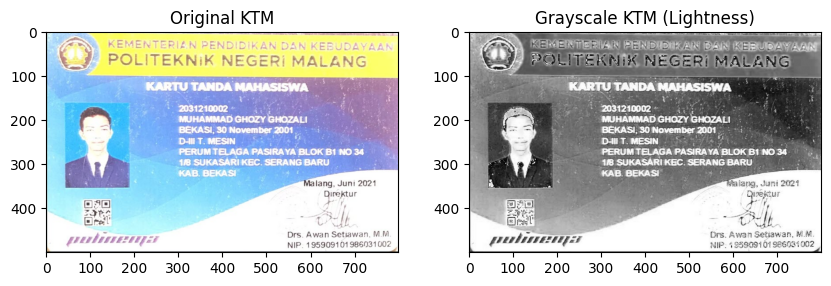

In [ ]:
# B. LIghtness
print('Mengimplementasikan transformasi grayscale (Metode Lightness')
print('--------------------------------------------------------------------')

# Mengambil dimensi gambar
height, width, channels = ktm.shape

grayscale_image_manual = np.zeros((height, width), dtype='uint8')

for y in range(height):
  for x in range(width):
    # Ngambil Value R ,G ,B tiap pixel nya
    r, g, b = ktm[y, x]

    # #Grayscale%&$'()*++ = max[R, G, B] + min[R, G, B]
    lightness_value = (max(r, g, b) + min(r, g, b)) // 2

    # menyimpan ke Array Grayscale
    grayscale_image_manual[y, x] = lightness_value

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title('Original KTM')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_manual, cmap='gray')
plt.title('Grayscale KTM (Lightness)')
plt.show()

Mengimplementasikan transformasi grayscale (Metode Luminance)
-------------------------------------------------------------


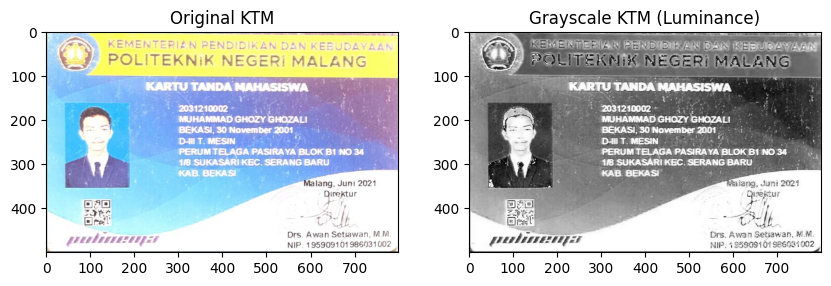

In [ ]:
# C. Luminance
print('Mengimplementasikan transformasi grayscale (Metode Luminance)')
print('-------------------------------------------------------------')

# Mengambil dimensi gambar
height, width, channels = ktm.shape

grayscale_image_luminance = np.zeros((height, width), dtype='uint8')

for y in range(height):
  for x in range(width):
    # Ngambil Value R ,G ,B tiap pixel nya
    r, g, b = ktm[y, x]


     # Grayscale dengan metode luminanc
    luminance_value = int(0.299 * r + 0.587 * g + 0.114 * b)

     # Simpan ke array grayscale
    grayscale_image_luminance[y, x] = luminance_value

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title('Original KTM')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image_manual, cmap='gray')
plt.title('Grayscale KTM (Luminance)')
plt.show()

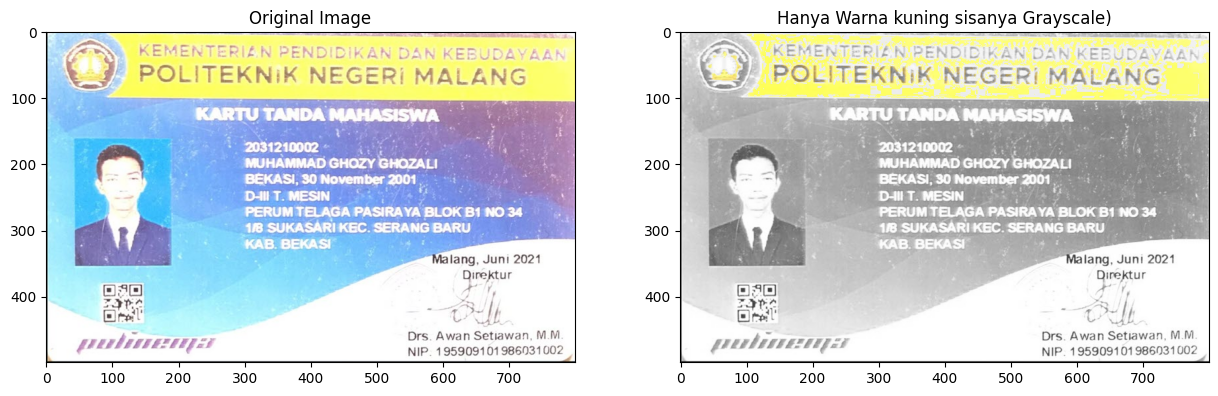

In [ ]:
# 5. menampilkan warna tertentu pada citra, dan ubah warna lain menjadi grayscale.

# Konversi ke HSV agar mudah melakukan masking warna
hsv = cv.cvtColor(ktm, cv.COLOR_BGR2HSV)

# Rentang warna kuning (perkiraan)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Masking untuk warna kuning
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Buat citra grayscale dari gambar asli
gray = cv.cvtColor(ktm, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan: bagian biru tetap berwarna, sisanya grayscale
result = np.where(mask[:, :, np.newaxis] != 0, ktm, gray_bgr)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title("Hanya Warna kuning sisanya Grayscale)")
plt.show()



---


# ***D2. Operasi Aritmatika dan Logika***

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


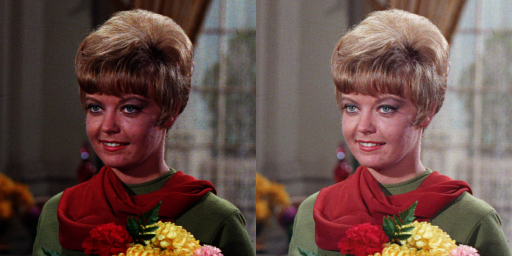

In [ ]:
# 1. Buat Gamma Correction

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
      print('Error, not a number')

gamma_corrected = np.array(255 * (original / 255) ** (1/gamma), dtype='uint8')

final_frame_gamma = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame_gamma)

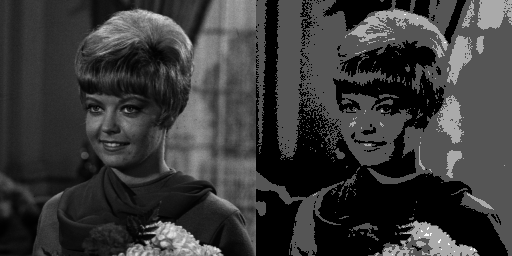

In [ ]:
# 2. Buat Simulasi Image Depth

# Bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

original_gray = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/female.tiff', cv.IMREAD_GRAYSCALE)

# Quantization sesuai bit depth
image_depth = np.round(original_gray / level) * level
image_depth = np.uint8(image_depth)


final_frame = cv.hconcat([original_gray, image_depth])
cv2_imshow(final_frame)


Jumlah gambar ditemukan: 100


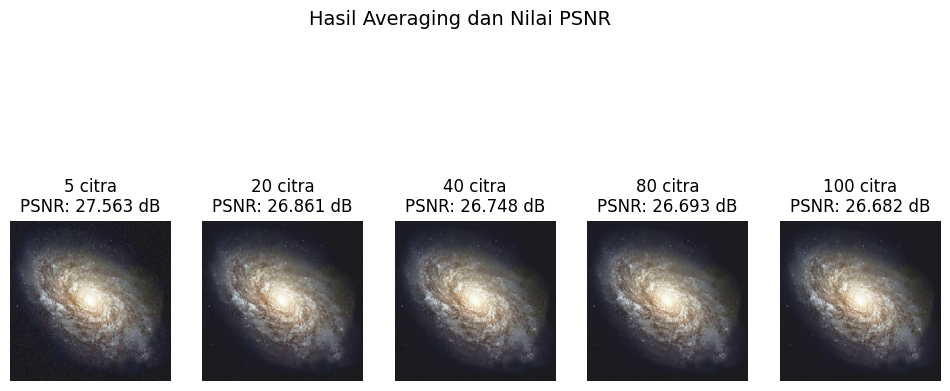

In [ ]:
# 3. Buat modul Average Denoising\

import glob
import math

# Ambil semua gambar noisy
image_paths = glob.glob('/content/drive/MyDrive/PCVK25_3F_11/Gambar/noises/*.jpg')
image_paths.sort()
print("Jumlah gambar ditemukan:", len(image_paths))

# Anggap gambar pertama sebagai ground truth
original = cv.imread(image_paths[0])
original = cv.resize(original, (200, 200))

# Baca semua gambar noisy
cv_img = []
for img in image_paths:
    n = cv.imread(img)
    n = cv.resize(n, (200, 200))
    cv_img.append(n.astype(np.float32))  # simpan sebagai float utk averaging

# Averaging manual
avg_5   = np.uint8(np.mean(cv_img[:5], axis=0))
avg_20  = np.uint8(np.mean(cv_img[:20], axis=0))
avg_40  = np.uint8(np.mean(cv_img[:40], axis=0))
avg_80  = np.uint8(np.mean(cv_img[:80], axis=0))
avg_100 = np.uint8(np.mean(cv_img[:100], axis=0))

# Hitung PSNR masing-masing
mse_5 = np.mean((avg_5.astype(np.float32) - original.astype(np.float32)) ** 2)
psnr_5 = 10 * math.log10((255.0 ** 2) / mse_5)

mse_20 = np.mean((avg_20.astype(np.float32) - original.astype(np.float32)) ** 2)
psnr_20 = 10 * math.log10((255.0 ** 2) / mse_20)

mse_40 = np.mean((avg_40.astype(np.float32) - original.astype(np.float32)) ** 2)
psnr_40 = 10 * math.log10((255.0 ** 2) / mse_40)

mse_80 = np.mean((avg_80.astype(np.float32) - original.astype(np.float32)) ** 2)
psnr_80 = 10 * math.log10((255.0 ** 2) / mse_80)

mse_100 = np.mean((avg_100.astype(np.float32) - original.astype(np.float32)) ** 2)
psnr_100 = 10 * math.log10((255.0 ** 2) / mse_100)

# Tampilkan hasil dengan matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 5, 1)
plt.imshow(cv.cvtColor(avg_5, cv.COLOR_BGR2RGB))
plt.title(f"5 citra\nPSNR: {psnr_5:.3f} dB")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(cv.cvtColor(avg_20, cv.COLOR_BGR2RGB))
plt.title(f"20 citra\nPSNR: {psnr_20:.3f} dB")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(cv.cvtColor(avg_40, cv.COLOR_BGR2RGB))
plt.title(f"40 citra\nPSNR: {psnr_40:.3f} dB")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(cv.cvtColor(avg_80, cv.COLOR_BGR2RGB))
plt.title(f"80 citra\nPSNR: {psnr_80:.3f} dB")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(cv.cvtColor(avg_100, cv.COLOR_BGR2RGB))
plt.title(f"100 citra\nPSNR: {psnr_100:.3f} dB")
plt.axis("off")

plt.suptitle("Hasil Averaging dan Nilai PSNR", fontsize=14)
plt.show()

**KESIMPULAN DARI HASIL PSNR**

Berdasarkan hasil perhitungan PSNR, terlihat bahwa ketika jumlah citra yang digunakan untuk proses averaging sedikit (misalnya 5 citra), nilai PSNR justru lebih tinggi dibandingkan ketika jumlah citra yang digunakan semakin banyak. Hal ini terjadi karena citra acuan (ground truth) yang digunakan adalah salah satu citra noisy, sehingga ketika dilakukan averaging dengan semakin banyak citra, hasil akhir menjadi lebih “bersih” dari noise acak, tetapi juga semakin berbeda dari citra acuan tersebut. Akibatnya, nilai MSE meningkat dan PSNR cenderung menurun. Dengan demikian, dapat disimpulkan bahwa walaupun averaging lebih banyak citra dapat mengurangi noise, jika acuan yang dipakai adalah citra noisy, maka nilai PSNR tidak selalu meningkat, bahkan bisa menurun karena hasil averaging tidak identik dengan citra acuan.

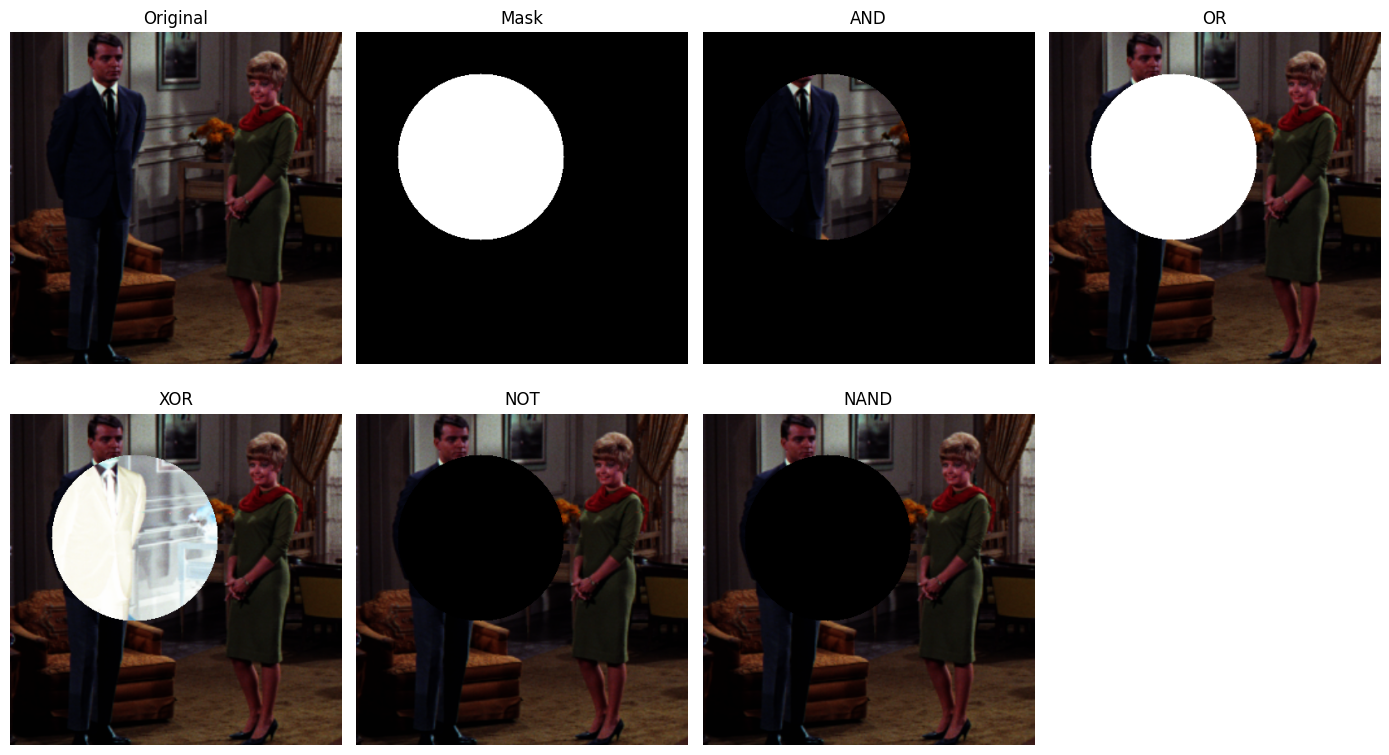

In [22]:
#5
# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/couple.tiff')
img = cv.resize(img, (400, 400))

# Buat mask lingkaran (grayscale)
mask = np.zeros(img.shape[:2], dtype="uint8")
cv.circle(mask, (150, 150), 100, 255, -1)

# Ubah mask ke 3 channel biar bisa operasi dengan gambar
mask_bgr = cv.merge([mask, mask, mask])

# AND → hanya area lingkaran yang ditampilkan
and_result = cv.bitwise_and(img, mask_bgr)

# OR → gabungan gambar asli dengan lingkaran putih
or_result = cv.bitwise_or(img, mask_bgr)

# XOR → hanya area yang berbeda (gambar luar + dalam lingkaran bolong)
xor_result = cv.bitwise_xor(img, mask_bgr)

# "NOT" (versi tanpa inverse warna):
# kita anggap NOT = gambar diluar lingkaran (background asli)
not_result = cv.bitwise_and(img, cv.bitwise_not(mask_bgr))

# NAND = kebalikan dari AND (jadi area lingkaran dibuang, sisanya gambar asli)
nand_result = cv.bitwise_and(img, cv.bitwise_not(mask_bgr))

# Tampilkan hasil
titles = ["Original", "Mask", "AND", "OR", "XOR", "NOT", "NAND"]
images = [img, mask, and_result, or_result, xor_result, not_result, nand_result]

plt.figure(figsize=(14, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    if i == 1:
        plt.imshow(images[i], cmap="gray")
    else:
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()



**HASIL ANALISA :**

Pada gambar di atas ditampilkan hasil penerapan berbagai operasi logika citra menggunakan sebuah mask berbentuk lingkaran putih. Pada bagian Original terlihat gambar asli, sedangkan Mask menunjukkan lingkaran putih sebagai area yang akan menjadi acuan operasi. Hasil AND hanya menampilkan bagian citra asli yang berada di dalam lingkaran, sementara area lain menjadi hitam. Pada OR, gambar asli dipadukan dengan lingkaran putih sehingga area lingkaran tampak penuh putih di atas citra. Operasi XOR menghasilkan perbedaan antara citra asli dan mask, sehingga area lingkaran tampak menonjol dengan efek terbalik. Pada NOT, citra dibalik berdasarkan mask, menghasilkan area lingkaran menjadi hitam dan bagian luar tetap menampilkan citra asli. Sedangkan pada NAND, hasilnya kebalikan dari AND, yaitu area di dalam lingkaran menjadi hitam, sementara bagian luar tetap menampilkan citra asli. Dengan demikian, setiap operator logika menunjukkan bagaimana citra dapat dimanipulasi secara berbeda berdasarkan mask biner yang digunakan.